In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [183]:
import sys
sys.path.append('../../src')
import numpy as np
import pandas as pd
import spaceoracle

In [4]:
data_ref = pd.read_csv('/Users/koush/Downloads/submit/case 1/data/simulate_data_2021_11_19_16_01_proj.csv')

In [173]:
import anndata
import scanpy as sc

In [5]:
data_ref.head()

id  row  col  latitude   longitude     beta0     beta1     beta2        x1  \
0   0    0    0      37.5  115.000000  1.058540  2.293887  1.056346  0.391720   
1   1    0    1      37.5  115.015873  1.015311  1.972091  1.112009  0.479254   
2   2    0    2      37.5  115.031746  1.165811  2.052675  0.740746  0.089783   
3   3    0    3      37.5  115.047619  1.407816  1.831076  1.029166  0.255784   
4   4    0    4      37.5  115.063492  1.348086  2.162551  1.043442  0.887085   

         x2         y       proj_x      proj_y  
0  0.566888  2.555933  12801741.44  4483017.17  
1  0.183225  2.164192  12803508.42  4483017.17  
2  0.308117  1.578343  12805275.39  4483017.17  
3  0.107331  1.986638  12807042.37  4483017.17  
4  0.555066  3.845633  12808809.35  4483017.17

In [186]:
adata = anndata.AnnData(
    X=data_ref[['x1', 'x2', 'y']],
    obs=data_ref[['id', 'row', 'col', 'latitude', 'longitude', 'proj_x', 'proj_y']],
    obsm={'spatial': data_ref[['proj_x', 'proj_y']].to_numpy()}
)

adata.obs['rctd_cluster'] = 0

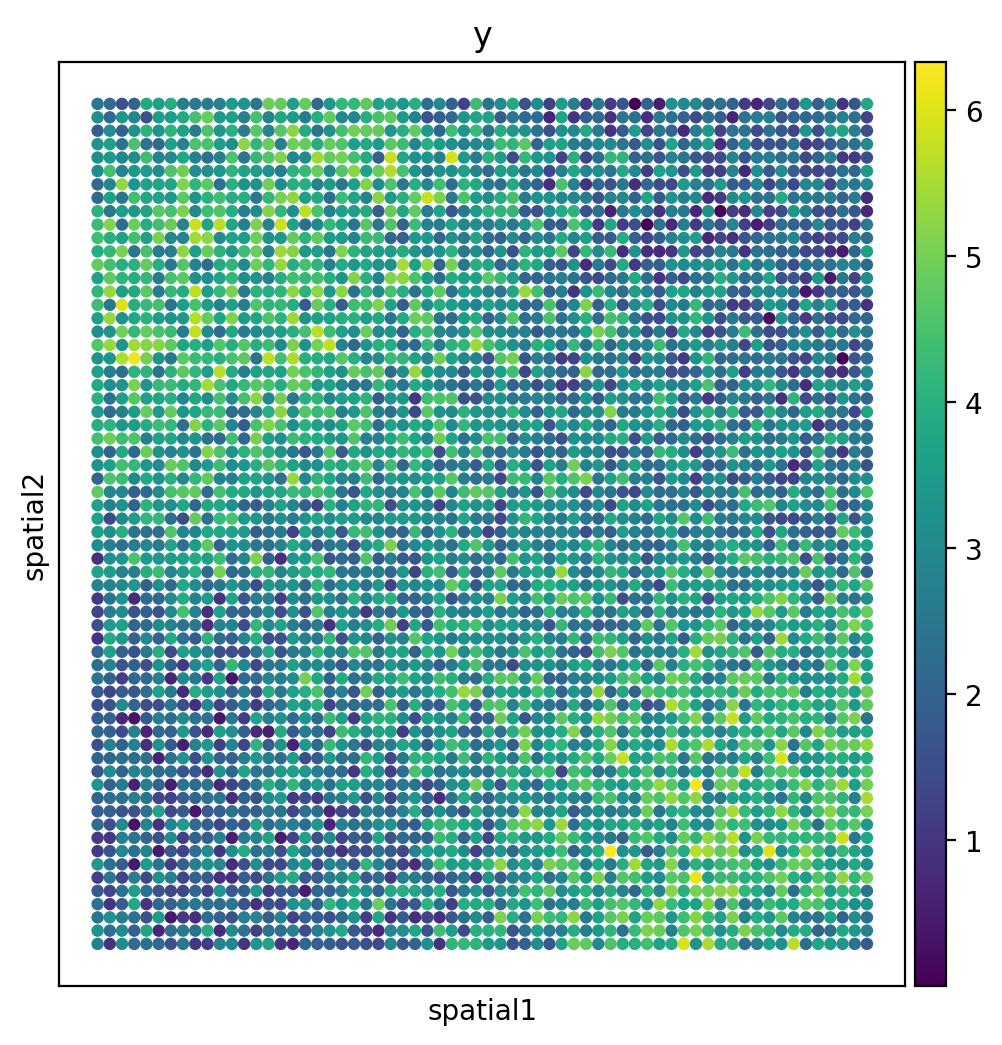

In [187]:
sc.pl.embedding(adata, basis='spatial', color=['y'], s=80)

In [189]:
spaceoracle.SpaceOracle.imbue_adata_with_space(
    adata,
    spatial_dim=64,
    method='fast',
    in_place=True,
)

🌍️ Generating spatial 64x64 maps...*


In [202]:
adata.obsm['spatial'][0]

array([12801741.44,  4483017.17])

12867119.55

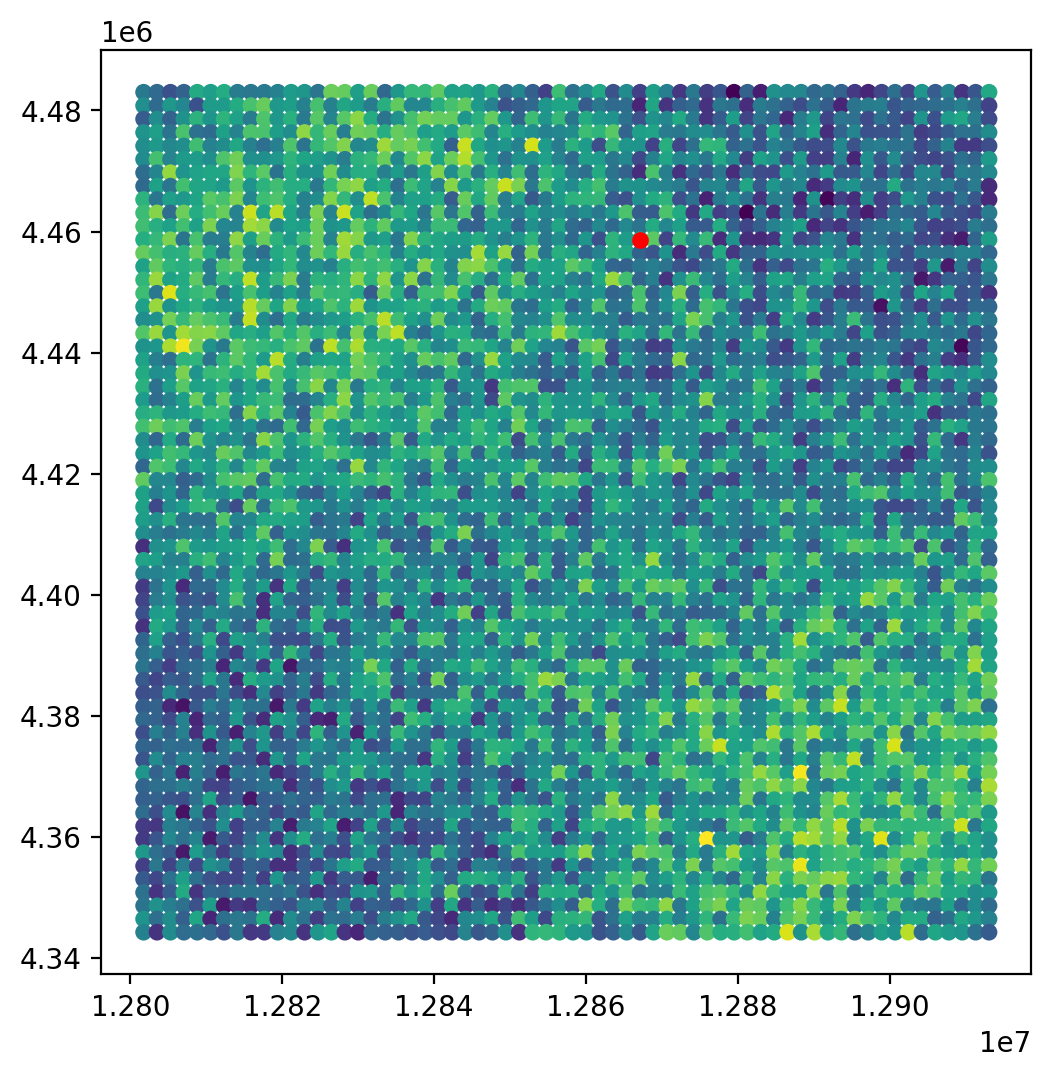

In [211]:
plt.scatter(adata.obsm['spatial'][:, 0], adata.obsm['spatial'][:, 1], c=adata.X[:, 2], s=25)
plt.scatter(train_data.iloc[0].proj_x, train_data.iloc[0].proj_y, c='red', s=25)


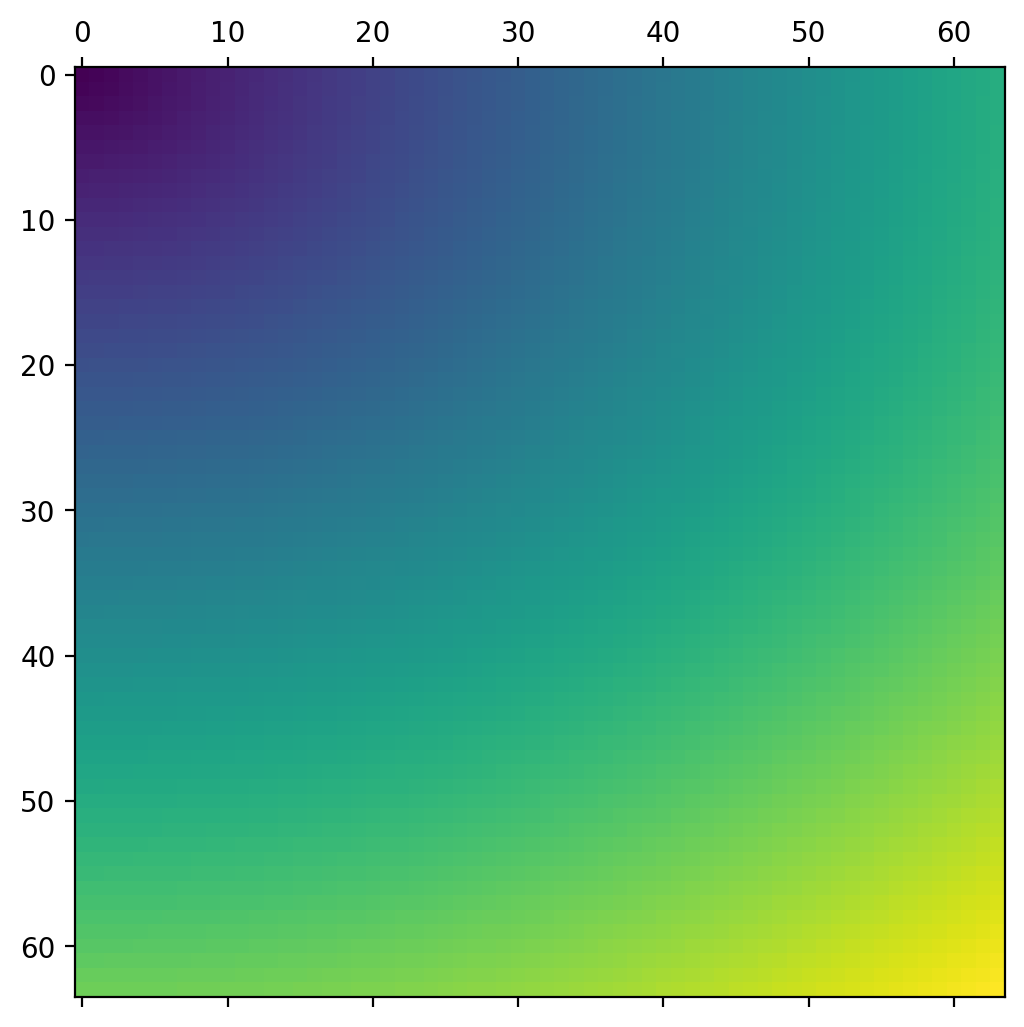

In [195]:
plt.matshow(adata.obsm['spatial_maps'][0][0])

In [108]:
data_ref.shape

(4096, 13)

In [109]:
x = data_ref['proj_x']
y = data_ref['proj_y']

In [111]:
import seaborn as sns

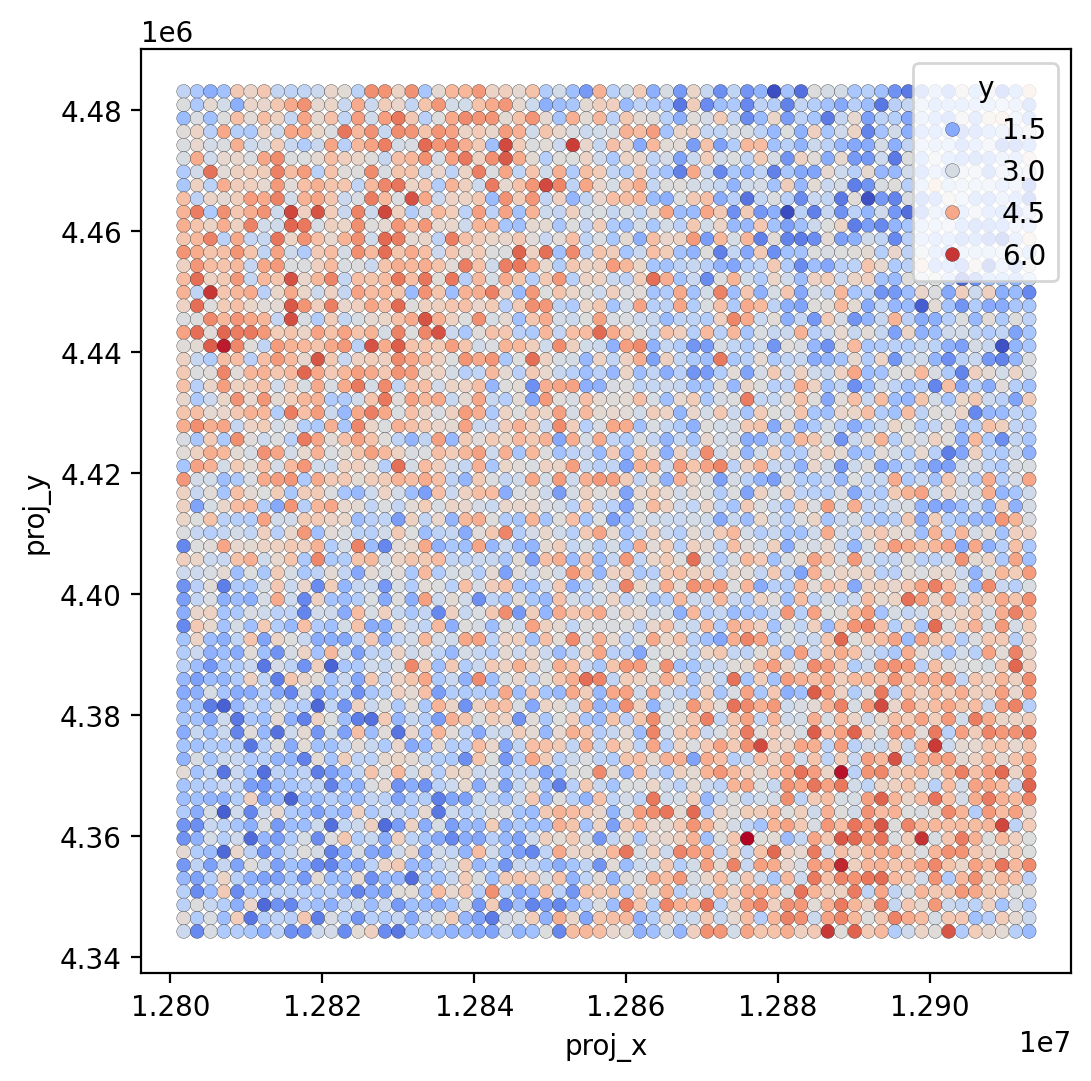

In [125]:
plt.rcParams['figure.figsize'] = [6, 6]
sns.scatterplot(
    data=data_ref, x='proj_x', y='proj_y', 
    hue='y', s=25, linewidth=0.1, edgecolor='black',
    palette='coolwarm'
)
plt.show()

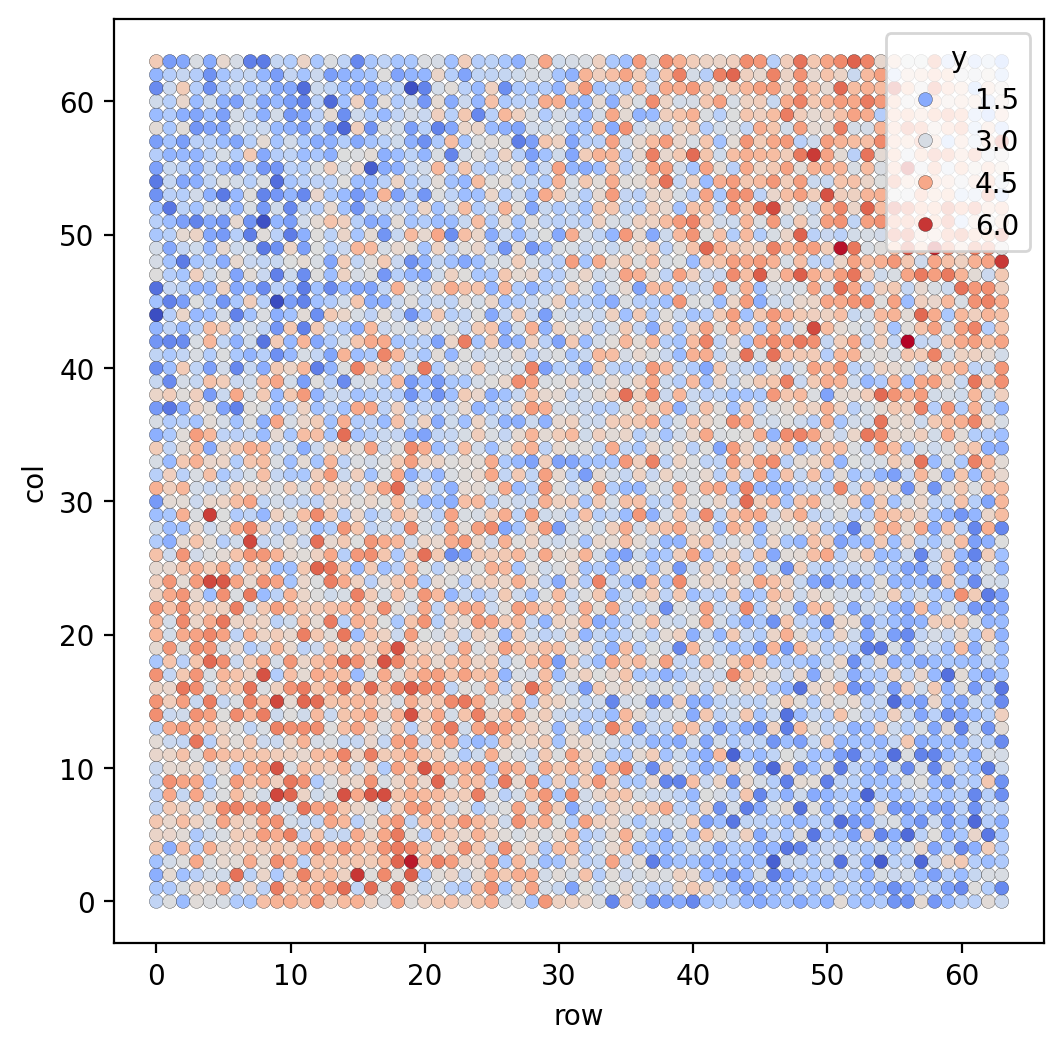

In [126]:
plt.rcParams['figure.figsize'] = [6, 6]
sns.scatterplot(
    data=data_ref, x='row', y='col', 
    hue='y', s=25, linewidth=0.1, edgecolor='black',
    palette='coolwarm'
)
plt.show()

In [127]:
data_ref_proj_x = np.array(data_ref['proj_x'], dtype=np.float64)
data_ref_proj_x

array([12801741.44, 12803508.42, 12805275.39, ..., 12909526.98,
       12911293.96, 12913060.93])

In [128]:
data_ref_proj_y = np.array(data_ref['proj_y'], dtype=np.float64)
data_ref_proj_y

array([4483017.17 , 4483017.17 , 4483017.17 , ..., 4344222.882,
       4344222.882, 4344222.882])

In [129]:
data = pd.read_csv('/Users/koush/Downloads/submit/case 1/data/simulate_data_2021_11_19_16_01_proj_sample.csv')

In [130]:
data

id  row  col   latitude   longitude     beta0     beta1     beta2  \
0    1421   22   13  37.150794  115.206349  1.581176  2.208094  2.086538   
1     405    6   21  37.404762  115.333333  1.748201  2.585447  1.147346   
2    1820   28   28  37.055556  115.444444  1.169864  2.196012  1.990522   
3     387    6    3  37.404762  115.047619  1.849429  2.065597  1.658342   
4     335    5   15  37.420635  115.238095  1.925009  2.376229  1.274395   
..    ...  ...  ...        ...         ...       ...       ...       ...   
773  3751   58   39  36.579365  115.619048  1.456098  2.875959  1.422675   
774  2361   36   57  36.928571  115.904762  1.086124  1.774858  2.673416   
775  2855   44   39  36.801587  115.619048  1.392121  2.298960  1.727041   
776  3554   55   34  36.626984  115.539682  1.030286  2.840822  1.249466   
777  3044   47   36  36.753968  115.571429  1.021916  2.560755  1.628589   

           x1        x2         y       proj_x       proj_y  
0    0.949576  0.736664  5.215006  12824712.13  4434339.598  
1    0.693686  0.014869  3.558749  12838847.94  4469718.814  
2    0.888582  0.206250  3.531744  12851216.77  4421103.316  
3    0.095648  0.748153  3.287692  12807042.37  4469718.814  
4    0.263940  0.080110  2.654283  12828246.08  4471934.021  
..        ...       ...       ...          ...          ...  
773  0.931296  0.361427  4.648659  12870653.51  4355171.503  
774  0.559680  0.490727  3.391393  12902459.08  4403480.972  
775  0.618136  0.274573  3.287391  12870653.51  4385888.210  
776  0.993413  0.228771  4.138236  12861818.63  4361746.125  
777  0.253168  0.930164  3.185072  12865352.58  4379298.514  

[778 rows x 13 columns]

In [131]:
data_coords = list(zip(data['proj_x'], data['proj_y']))
data_coords = np.array(data_coords, dtype=np.float64)

y_data = np.array(data['y'], dtype=np.float64).reshape((-1, 1))

x1_data = np.array(data['x1'], dtype=np.float64).reshape((-1, 1))
x2_data = np.array(data['x2'], dtype=np.float64).reshape((-1, 1))
x_data = np.hstack([x1_data, x2_data])

In [132]:
test_data = pd.read_csv('/Users/koush/Downloads/submit/case 1/data/simulate_data_2021_11_19_16_01_proj_no_sample.csv')

In [133]:
test_data

id  row  col  latitude   longitude     beta0     beta1     beta2  \
0        0    0    0      37.5  115.000000  1.058540  2.293887  1.056346   
1        2    0    2      37.5  115.031746  1.165811  2.052675  0.740746   
2        3    0    3      37.5  115.047619  1.407816  1.831076  1.029166   
3        5    0    5      37.5  115.079365  1.501915  2.138349  0.761257   
4        6    0    6      37.5  115.095238  1.428832  2.277155  0.832471   
...    ...  ...  ...       ...         ...       ...       ...       ...   
3313  4091   63   59      36.5  115.936508  1.559996  2.286203  1.300961   
3314  4092   63   60      36.5  115.952381  1.492840  1.992985  1.210815   
3315  4093   63   61      36.5  115.968254  1.351371  2.208942  1.013919   
3316  4094   63   62      36.5  115.984127  1.481544  2.258388  1.226454   
3317  4095   63   63      36.5  116.000000  1.235869  1.891021  1.152580   

            x1        x2         y       proj_x       proj_y  
0     0.391720  0.566888  2.555933  12801741.44  4483017.170  
1     0.089783  0.308117  1.578343  12805275.39  4483017.170  
2     0.255784  0.107331  1.986638  12807042.37  4483017.170  
3     0.948002  0.006931  3.534350  12810576.32  4483017.170  
4     0.899581  0.508416  3.900559  12812343.30  4483017.170  
...        ...       ...       ...          ...          ...  
3313  0.542107  0.723439  3.740529  12905993.03  4344222.882  
3314  0.480357  0.827767  3.452458  12907760.00  4344222.882  
3315  0.808941  0.177852  3.318602  12909526.98  4344222.882  
3316  0.213466  0.334173  2.373481  12911293.96  4344222.882  
3317  0.229529  0.140554  1.831912  12913060.93  4344222.882  

[3318 rows x 13 columns]

In [134]:
data_coords_test = list(zip(test_data['proj_x'], test_data['proj_y']))
data_coords_test = np.array(data_coords_test, dtype=np.float64)

y_test = np.array(test_data['y'], dtype=np.float64).reshape((-1, 1))

x1_test = np.array(test_data['x1'], dtype=np.float64).reshape((-1, 1))
x2_test = np.array(test_data['x2'], dtype=np.float64).reshape((-1, 1))
x_test = np.hstack([x1_test, x2_test])

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
x_scaler = StandardScaler()

x_data_scaled = x_scaler.fit_transform(x_data)
x_test_scaled = x_scaler.transform(x_test)

In [137]:
from pysal.model.spreg import OLS

In [138]:
ols = OLS(y_data, x_data, name_y = 'y', name_x = ['x1', 'x2'])

In [139]:
beta_ols = ols.betas
beta_ols

array([[1.15172354],
       [2.36169016],
       [1.86769726]])

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
train_data, valid_data = train_test_split(data, train_size=0.8, random_state=6)

In [142]:
train_data.shape, valid_data.shape

((622, 13), (156, 13))

In [143]:
data_coords_train = list(zip(train_data['proj_x'], train_data['proj_y']))
data_coords_train = np.array(data_coords_train, dtype=np.float64)

y_train = np.array(train_data['y'], dtype=np.float64).reshape((-1, 1))

x1_train = np.array(train_data['x1'], dtype=np.float64).reshape((-1, 1))
x2_train = np.array(train_data['x2'], dtype=np.float64).reshape((-1, 1))
x_train = np.hstack([x1_train, x2_train])

In [144]:
data_coords_valid = list(zip(valid_data['proj_x'], valid_data['proj_y']))
data_coords_valid = np.array(data_coords_valid, dtype=np.float64)

y_valid = np.array(valid_data['y'], dtype=np.float64).reshape((-1, 1))

x1_valid = np.array(valid_data['x1'], dtype=np.float64).reshape((-1, 1))
x2_valid = np.array(valid_data['x2'], dtype=np.float64).reshape((-1, 1))
x_valid = np.hstack([x1_valid, x2_valid])

In [145]:
x_train_scaled = x_scaler.transform(x_train)

x_valid_scaled = x_scaler.transform(x_valid)

In [146]:
def get_cnn_dis(sample_coords, ref_coords_x, ref_coords_y):
    dis_list = []
    for i in range(sample_coords.shape[0]):
        sample_coords_x = sample_coords[i][0]
        sample_coords_y = sample_coords[i][1]
        dis = np.sqrt(np.square(ref_coords_x - sample_coords_x) + np.square(ref_coords_y - sample_coords_y))
        dis_list.append(dis)
    return np.array(dis_list)

In [147]:
from spaceoracle.models.spatial_map import xyc2spatial


In [197]:
data_ref_proj_x

array([12801741.44, 12803508.42, 12805275.39, ..., 12909526.98,
       12911293.96, 12913060.93])

In [199]:
adata.obsm['spatial'][:, 0]

array([12801741.44, 12803508.42, 12805275.39, ..., 12909526.98,
       12911293.96, 12913060.93])

In [196]:
dis_train = get_cnn_dis(data_coords_train, data_ref_proj_x, data_ref_proj_y)
print('dis_train shape:', dis_train.shape)

dis_valid = get_cnn_dis(data_coords_valid, data_ref_proj_x, data_ref_proj_y)
print('dis_valid shape:', dis_valid.shape)

dis_test = get_cnn_dis(data_coords_test, data_ref_proj_x, data_ref_proj_y)
print('dis_test shape:', dis_test.shape)

dis_data = get_cnn_dis(data_coords, data_ref_proj_x, data_ref_proj_y)
print('dis_data shape:', dis_data.shape)

dis_train shape: (622, 4096)
dis_valid shape: (156, 4096)
dis_test shape: (3318, 4096)
dis_data shape: (778, 4096)


In [159]:
data_coords_train.shape

(622, 2)

In [160]:
dis_train = xyc2spatial(
    data_coords_train[:, 0],
    data_coords_train[:, 1],
    np.zeros(data_coords_train.shape[0]),
    64,
    64,
)

dis_valid = xyc2spatial(
    data_coords_valid[:, 0],
    data_coords_valid[:, 1],
    np.zeros(data_coords_valid.shape[0]),
    64,
    64,
)

dis_test = xyc2spatial(
    data_coords_test[:, 0],
    data_coords_test[:, 1],
    np.zeros(data_coords_test.shape[0]),
    64,
    64,
)

dis_data = xyc2spatial(
    data_coords[:, 0],
    data_coords[:, 1],
    np.zeros(data_coords.shape[0]),
    64,
    64,
)


In [162]:
dis_train[0].shape

(1, 64, 64)

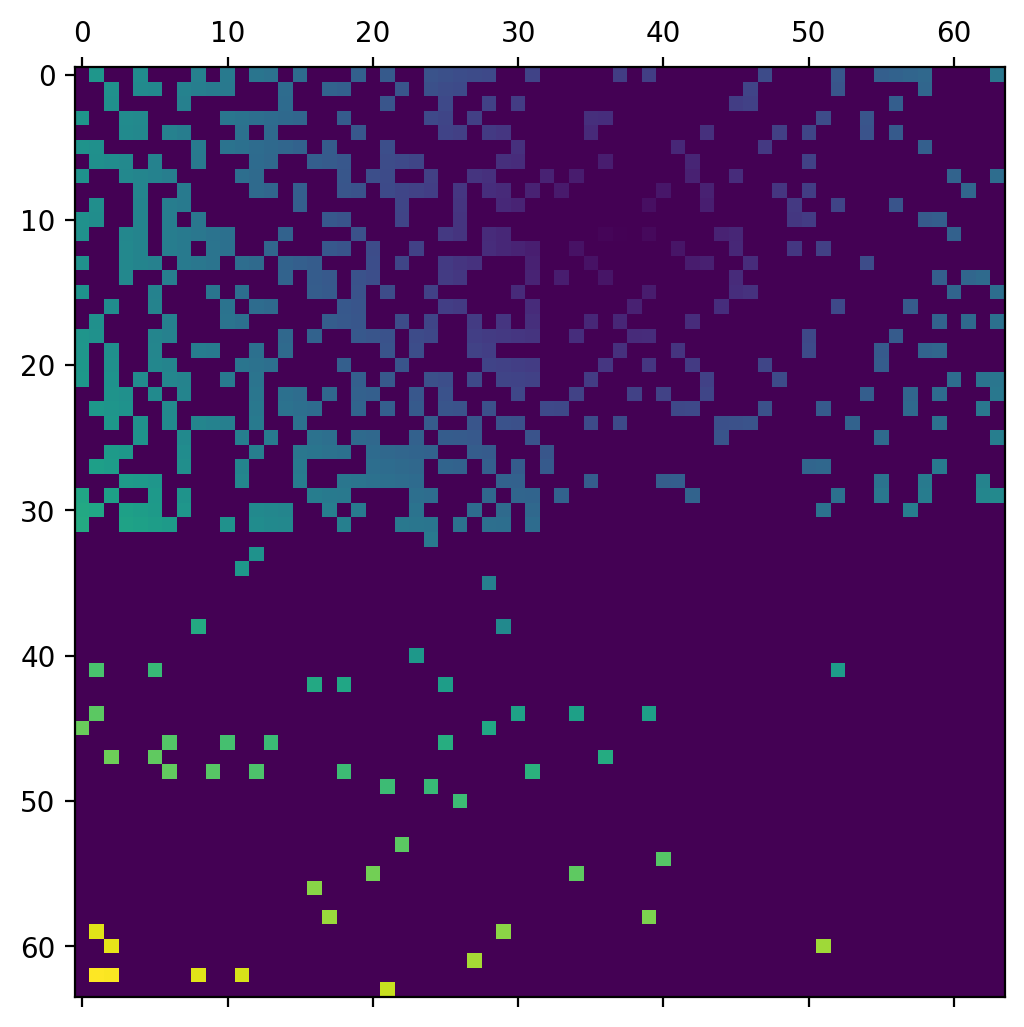

In [161]:
plt.matshow(dis_train[0].reshape(64, 64))

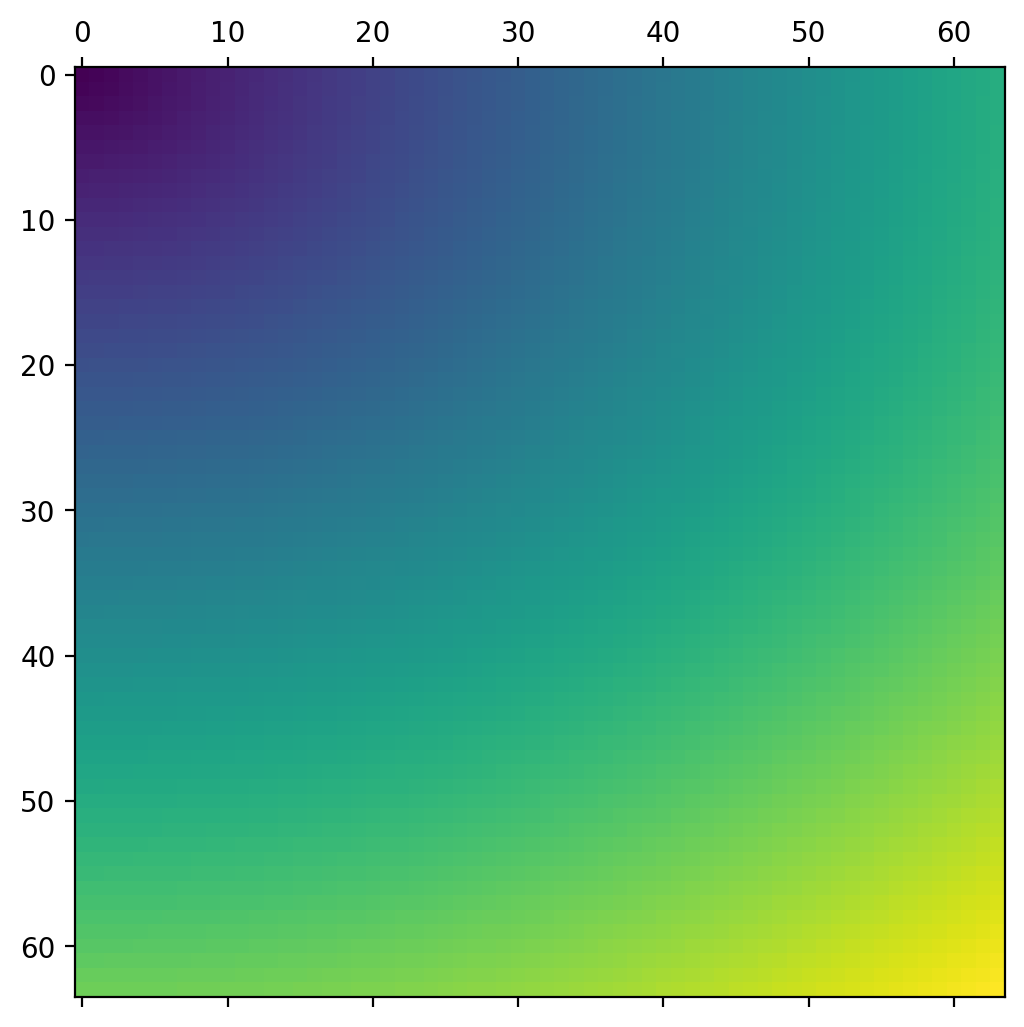

In [152]:
plt.matshow(dis_train2[0][0])

In [154]:
dis_scaler = StandardScaler()

dis_train_scaled = dis_scaler.fit_transform(dis_train)
dis_valid_scaled = dis_scaler.transform(dis_valid)
dis_test_scaled = dis_scaler.transform(dis_test)
dis_data_scaled = dis_scaler.transform(dis_data)

ValueError: Found array with dim 4. StandardScaler expected <= 2.

In [91]:
dis_train_scaled.shape

(622, 4096)

In [92]:
def reshape_dis(dis_to_reshape):
    dis_reshaped = []
    for i in range(dis_to_reshape.shape[0]):
        dis_ = np.expand_dims(dis_to_reshape[i].reshape(64, 64), axis=2)
        dis_reshaped.append(dis_)
    return np.array(dis_reshaped)

In [93]:
dis_train_scaled = reshape_dis(dis_train_scaled)
print('dis_train_scaled shape:', dis_train_scaled.shape)

dis_valid_scaled = reshape_dis(dis_valid_scaled)
print('dis_valid_scaled shape:', dis_valid_scaled.shape)

dis_test_scaled = reshape_dis(dis_test_scaled)
print('dis_test_scaled shape:', dis_test_scaled.shape)

dis_data_scaled = reshape_dis(dis_data_scaled)
print('dis_data_scaled shape:', dis_data_scaled.shape)

dis_train_scaled shape: (622, 64, 64, 1)
dis_valid_scaled shape: (156, 64, 64, 1)
dis_test_scaled shape: (3318, 64, 64, 1)
dis_data_scaled shape: (778, 64, 64, 1)


In [94]:
import matplotlib.pyplot as plt

In [95]:
import torch.nn as nn
import random
import torch
from torch.nn.utils.parametrizations import weight_norm

def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)
    
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    
    if torch.backends.mps.is_available():
        torch.mps.manual_seed(seed)



In [96]:
beta_ols

array([[1.15172354],
       [2.36169016],
       [1.86769726]])

In [97]:
class SimpleCNN(nn.Module):
    def __init__(self, nbetas, spatial_dim=64,in_channels=1, init=0.1):
        set_seed(42)
        super().__init__()
        self.dim = nbetas
        # self.betas = torch.tensor(betas.astype(np.float32)).to(device)
        
        self.conv_layers = nn.Sequential(
            weight_norm(nn.Conv2d(in_channels, 32, kernel_size=3, padding='same')),
            nn.PReLU(init=init),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            weight_norm(nn.Conv2d(32, 64, kernel_size=3, padding='same')),
            nn.PReLU(init=init),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            weight_norm(nn.Conv2d(64, 256, kernel_size=3, padding='same')),
            nn.PReLU(init=init),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten()
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(256, 128),
            nn.PReLU(init=init),
            
            nn.Linear(128, 64),
            nn.PReLU(init=init),
            
            nn.Linear(64, 16),
            nn.PReLU(init=init),
            nn.Dropout(0.2),
            nn.Linear(16, self.dim)
        )

    def forward(self, spatial_map):
        spatial_features = self.conv_layers(spatial_map)
        betas = self.fc_layers(spatial_features)
        return betas
    
    def predict_y(self, spatial_map, inputs_x):
        betas = self.forward(spatial_map)
        w0 = betas[:, 0]
        w1 = betas[:, 1]
        w2 = betas[:, 2]

        y_pred = w0*beta_ols[0][0] + w1*beta_ols[1][0]*inputs_x[:, 0] + w2*beta_ols[2][0]*inputs_x[:, 1]
        
        return y_pred

In [98]:
import sys
sys.path.append('../../src')
from spaceoracle.models.pixel_attention import ConditionalConv2D


class NicheAttentionNetwork(nn.Module):
     
    def __init__(self, n_regulators, in_channels, spatial_dim):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels = in_channels
        self.spatial_dim = spatial_dim
        self.dim = n_regulators+1
        # self.conditional_conv = ConditionalConv2D(self.in_channels, self.in_channels, 1)
        self.conditional_conv = nn.Conv2d(self.in_channels, self.in_channels, 1)

        self.sigmoid = nn.Sigmoid()

        self.conv_layers = nn.Sequential(
            weight_norm(nn.Conv2d(in_channels, 32, kernel_size=3, padding='same')),
            nn.PReLU(init=0.1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            weight_norm(nn.Conv2d(32, 64, kernel_size=3, padding='same')),
            nn.PReLU(init=0.1),
            nn.MaxPool2d(kernel_size=2, stride=2),

            weight_norm(nn.Conv2d(64, 128, kernel_size=3, padding='same')),
            nn.PReLU(init=0.1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten()
        )

        self.cluster_emb = nn.Embedding(self.in_channels, 128)

        self.mlp = nn.Sequential(
            nn.Linear(128, 64),
            nn.PReLU(init=0.1),
            nn.Linear(64, self.dim)
        )

        self.alpha = nn.Parameter(torch.tensor(1.0), requires_grad=True)

        self.output_activation = nn.Tanh()


    def forward(self, spatial_maps, cluster_info):
        # att = self.sigmoid(self.conditional_conv(spatial_maps, cluster_info))
        att = self.sigmoid(self.conditional_conv(spatial_maps))
        out = att * spatial_maps
        out = self.conv_layers(out)
        emb = self.cluster_emb(cluster_info) * self.alpha
        out = out + emb 
        betas = self.mlp(out)
        return betas
    
    def predict_y(self, spatial_map, inputs_x, cluster_info):
        betas = self.forward(spatial_map, cluster_info)
        w0 = betas[:, 0]
        w1 = betas[:, 1]
        w2 = betas[:, 2]

        y_pred = w0*beta_ols[0][0] + w1*beta_ols[1][0]*inputs_x[:, 0] + w2*beta_ols[2][0]*inputs_x[:, 1]
        
        return y_pred

In [36]:
# model = SimpleCNN(nbetas=3, spatial_dim=64, in_channels=1, init=0.1)

In [104]:
def gather_predictions(model):
    with torch.no_grad():
        cnn_y_pred = model.predict_y(
            torch.from_numpy(dis_test_scaled).permute(0, 3, 1, 2).float(), 
            torch.from_numpy(x_test).float(), 
            torch.zeros(x_test.shape[0]).long()
        ).reshape(-1, 1)

        cnn_y_data = model.predict_y(
            torch.from_numpy(dis_data_scaled).permute(0, 3, 1, 2).float(), 
            torch.from_numpy(x_data).float(), 
            torch.zeros(x_data.shape[0]).long()
        ).reshape(-1, 1)
            
        cnn_beta_pred = model.forward(
            torch.from_numpy(dis_test_scaled).permute(0, 3, 1, 2).float(),
            torch.zeros(x_test.shape[0]).long()
        )

        cnn_beta_data = model.forward(
            torch.from_numpy(dis_data_scaled).permute(0, 3, 1, 2).float(),
            torch.zeros(x_data.shape[0]).long()
        )

        cnn_beta0_pred = cnn_beta_pred[:, 0] * beta_ols[0][0]
        cnn_beta1_pred = cnn_beta_pred[:, 1] * beta_ols[1][0]
        cnn_beta2_pred = cnn_beta_pred[:, 2] * beta_ols[2][0]
        cnn_beta0_data = cnn_beta_data[:, 0] * beta_ols[0][0]
        cnn_beta1_data = cnn_beta_data[:, 1] * beta_ols[1][0]
        cnn_beta2_data = cnn_beta_data[:, 2] * beta_ols[2][0]

        test_data['pred_y'] = cnn_y_pred.squeeze().tolist()
        test_data['pred_beta0'] = cnn_beta0_pred.tolist()
        test_data['pred_beta1'] = cnn_beta1_pred.tolist()
        test_data['pred_beta2'] = cnn_beta2_pred.tolist()

        data['pred_y'] = cnn_y_data.squeeze().tolist()
        data['pred_beta0'] = cnn_beta0_data.tolist()
        data['pred_beta1'] = cnn_beta1_data.tolist()
        data['pred_beta2'] = cnn_beta2_data.tolist()

        data_result_df = pd.concat([data, test_data])
        data_result_df = data_result_df.sort_values(by='id')

        y_true = np.array(data_result_df['y'], dtype=np.float64).reshape(64, 64)
        beta0_true = np.array(data_result_df['beta0'], dtype=np.float64).reshape(64, 64)
        beta1_true = np.array(data_result_df['beta1'], dtype=np.float64).reshape(64, 64)
        beta2_true = np.array(data_result_df['beta2'], dtype=np.float64).reshape(64, 64)

        y_pred = np.array(data_result_df['pred_y'], dtype=np.float64).reshape(64, 64)
        beta0_pred = np.array(data_result_df['pred_beta0'], dtype=np.float64).reshape(64, 64)
        beta1_pred = np.array(data_result_df['pred_beta1'], dtype=np.float64).reshape(64, 64)
        beta2_pred = np.array(data_result_df['pred_beta2'], dtype=np.float64).reshape(64, 64)

        return y_true, beta0_true, beta1_true, beta2_true, y_pred, beta0_pred, beta1_pred, beta2_pred

In [100]:
# Define loss function and optimizer
criterion = nn.MSELoss()
model = NicheAttentionNetwork(3, in_channels=1, spatial_dim=64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Number of epochs
num_epochs = 1000

# Training loop
for epoch in range(num_epochs):
    model.train()
    # Convert numpy arrays to PyTorch tensors
    spatial_map = torch.from_numpy(dis_train_scaled).permute(0, 3, 1, 2).float()
    inputs_x = torch.from_numpy(x_train).float()
    cluster_info = torch.zeros(spatial_map.shape[0]).long()
    y_true = torch.from_numpy(y_train).float()

    # Zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    y_pred = model.predict_y(spatial_map, inputs_x, cluster_info)

    # Compute loss
    loss = criterion(y_pred.squeeze(), y_true.squeeze())

    # Backward pass and optimize
    loss.backward()
    optimizer.step()

    model.eval()
    # Print statistics
    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}')
        # y_true, beta0_pred, beta1_pred, beta2_pred = gather_predictions(model)

        # fig, ax = plt.subplots(1, 3, figsize=(20, 10))
        # ax = ax.flatten()
        # cmap = 'RdYlBu_r'
        # ax[0].matshow(beta0_pred, cmap=cmap)
        # ax[1].matshow(beta1_pred, cmap=cmap)
        # ax[2].matshow(beta2_pred, cmap=cmap)
        # plt.savefig(f'/tmp/sim/beta_pred_{epoch}.png', dpi=120)
        # plt.close(fig)  # Close the figure to prevent display


Epoch [0/1000], Loss: 8.5191
Epoch [100/1000], Loss: 0.1894
Epoch [200/1000], Loss: 0.1737
Epoch [300/1000], Loss: 0.1715
Epoch [400/1000], Loss: 0.1705
Epoch [500/1000], Loss: 0.1697
Epoch [600/1000], Loss: 0.1690
Epoch [700/1000], Loss: 0.1685
Epoch [800/1000], Loss: 0.1680
Epoch [900/1000], Loss: 0.1671


In [47]:
model.eval();

In [101]:
# import os
# import glob
# from PIL import Image
# import imageio

# # Path to the folder containing the images
# image_folder = '/tmp/sim/'

# # Get all png files in the folder, sorted by name
# image_files = sorted(glob.glob(os.path.join(image_folder, 'beta_pred_*.png')))

# # Read all images
# images = []
# for filename in image_files:
#     images.append(imageio.imread(filename))

# # Save as GIF
# output_file = '/tmp/sim/beta_predictions.gif'
# imageio.mimsave(output_file, images, duration=60)  # duration is the time between frames in seconds

# print(f"GIF created: {output_file}")


In [105]:
y_true, beta0_true, beta1_true, beta2_true, y_pred, beta0_pred, beta1_pred, beta2_pred = gather_predictions(model)

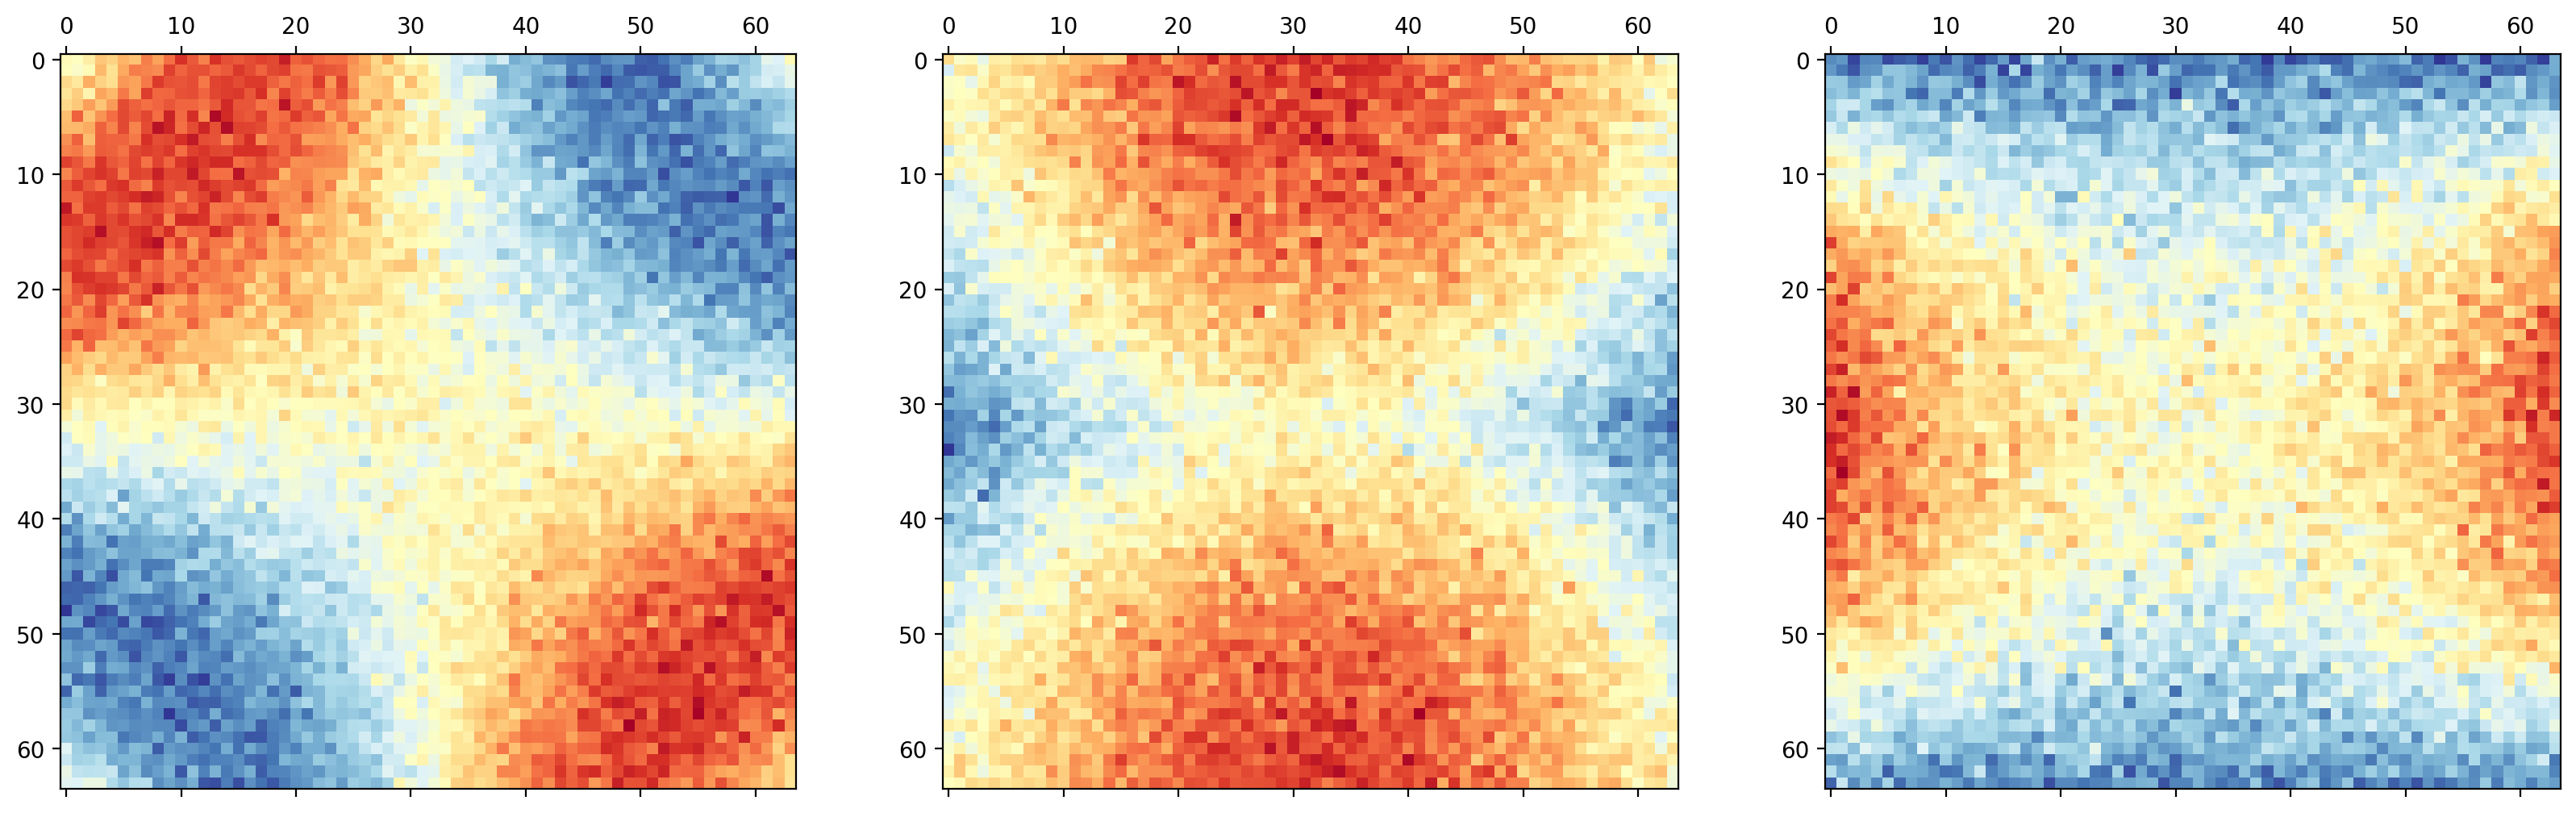

In [106]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax = ax.flatten()
cmap = 'RdYlBu_r'
ax[0].matshow(beta0_true, cmap=cmap)
ax[1].matshow(beta1_true, cmap=cmap)
ax[2].matshow(beta2_true, cmap=cmap)
plt.show()

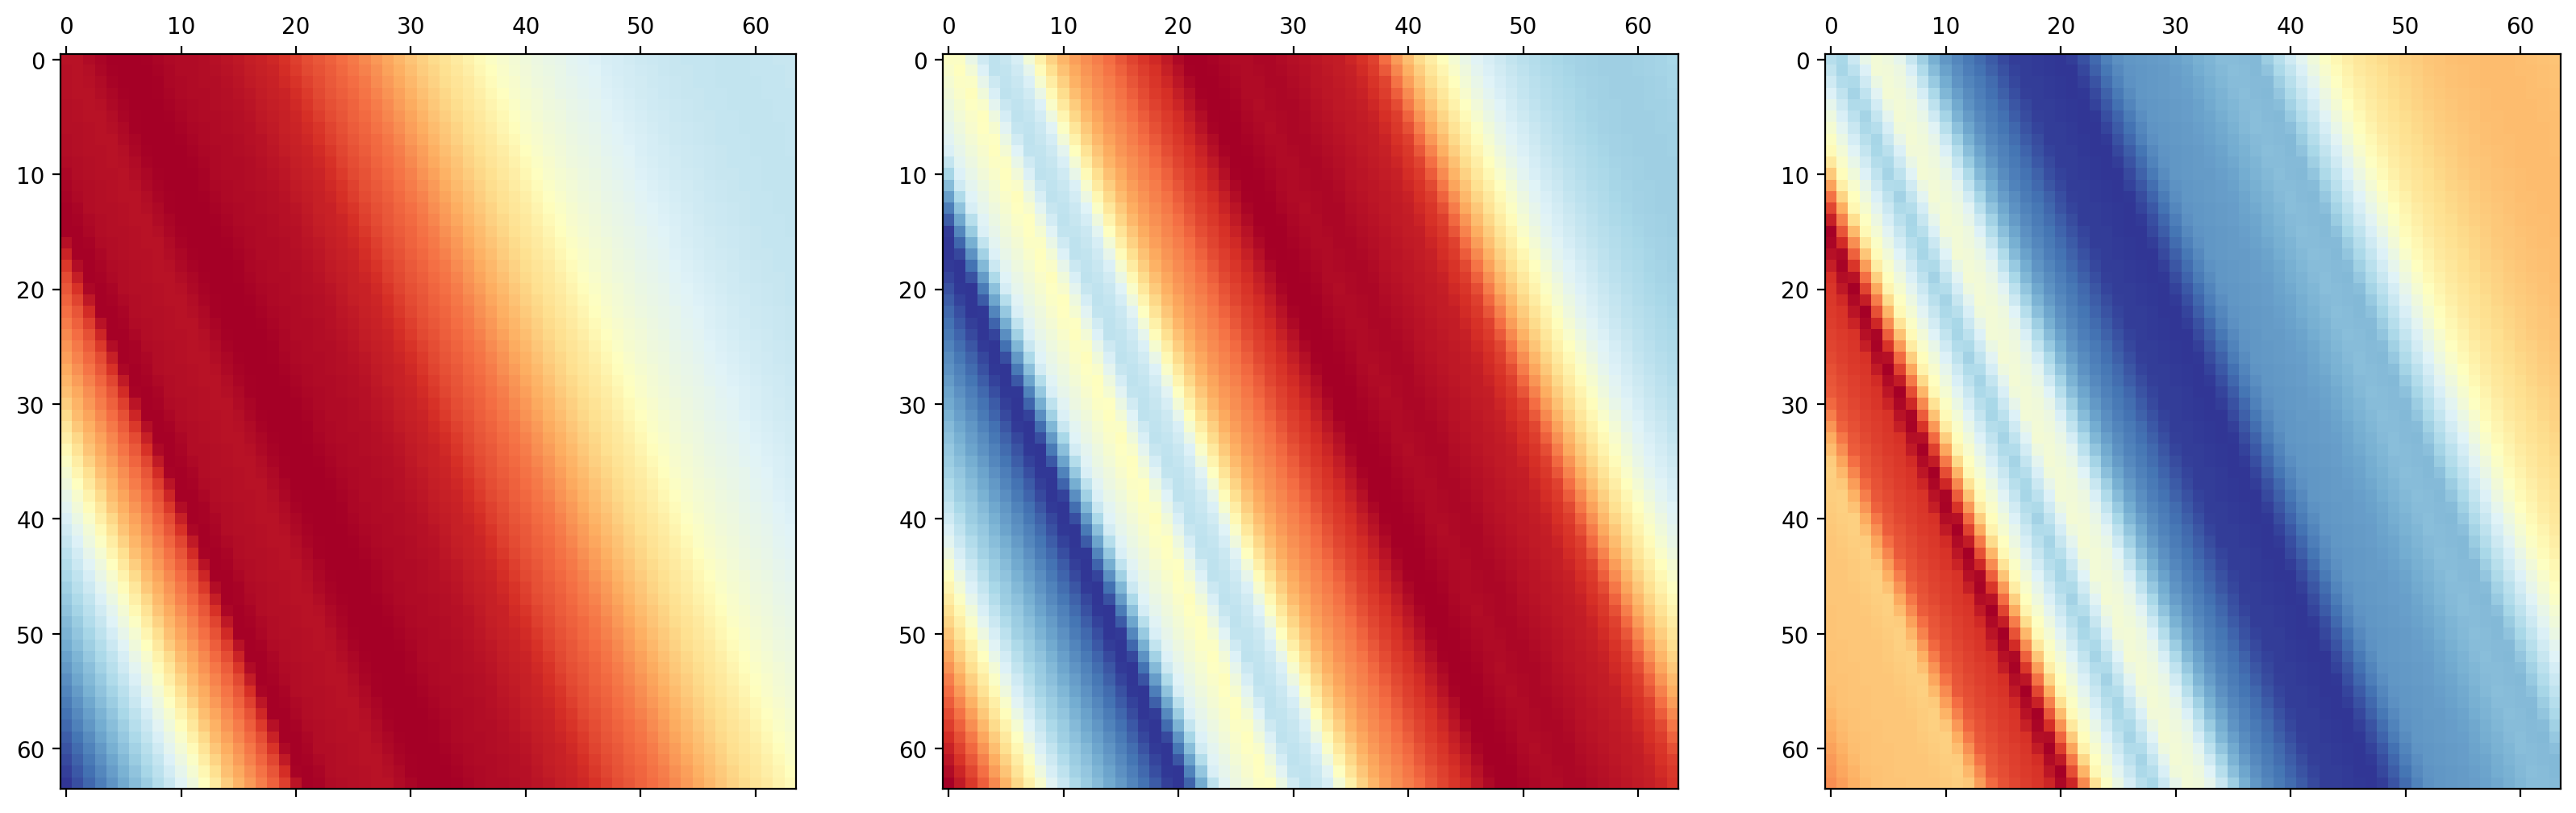

In [107]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax = ax.flatten()
cmap = 'RdYlBu_r'
ax[0].matshow(beta0_pred, cmap=cmap)
ax[1].matshow(beta1_pred, cmap=cmap)
ax[2].matshow(beta2_pred, cmap=cmap)
plt.show()

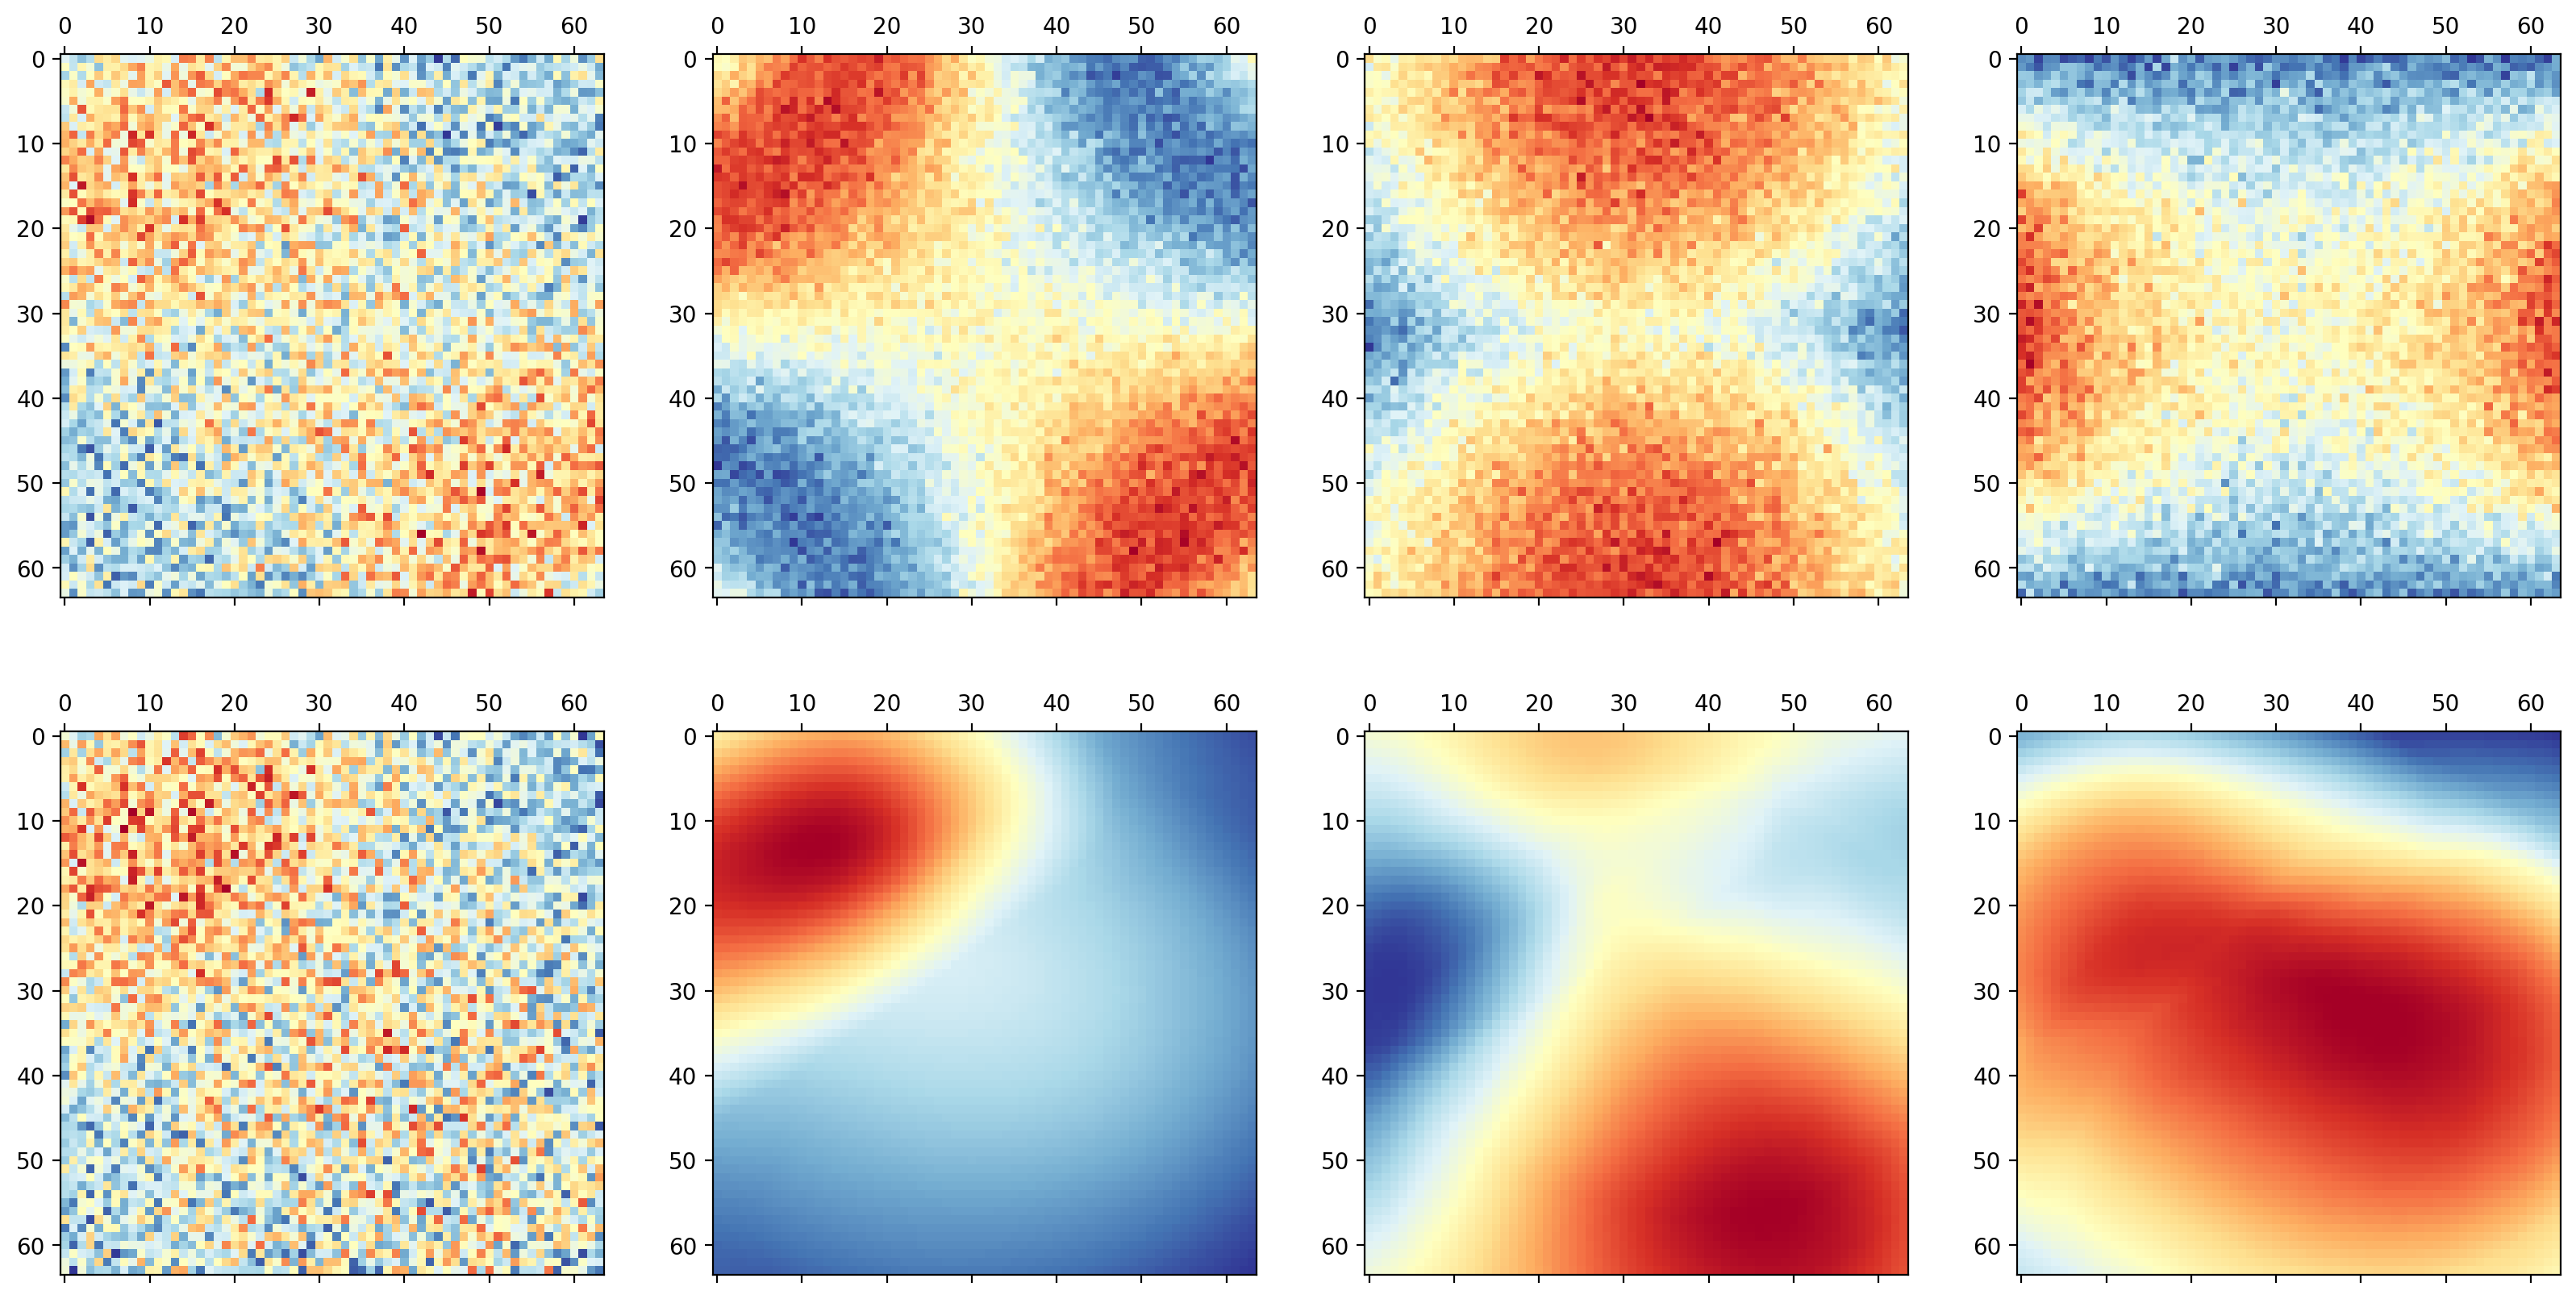

In [168]:
figure = plt.figure(figsize=(20, 10))
cmap = 'RdYlBu_r'
axes_y_true = figure.add_subplot(2, 4, 1)
axes_beta0_true = figure.add_subplot(2, 4, 2)
axes_beat1_true = figure.add_subplot(2, 4, 3)
axes_beta2_true = figure.add_subplot(2, 4, 4)
axes_y_pred = figure.add_subplot(2, 4, 5)
axes_beta0_pred = figure.add_subplot(2, 4, 6)
axes_beat1_pred = figure.add_subplot(2, 4, 7)
axes_beta2_pred = figure.add_subplot(2, 4, 8)

axes_y_true.matshow(y_true, cmap=cmap)
axes_beta0_true.matshow(beta0_true, cmap=cmap)
axes_beat1_true.matshow(beta1_true, cmap=cmap)
axes_beta2_true.matshow(beta2_true, cmap=cmap)
axes_y_pred.matshow(y_pred, cmap=cmap)
axes_beta0_pred.matshow(beta0_pred, cmap=cmap)
axes_beat1_pred.matshow(beta1_pred, cmap=cmap)
axes_beta2_pred.matshow(beta2_pred, cmap=cmap)

plt.show()